In [ ]:
import cvxopt
print(cvxopt.__version__)
from cvxopt import matrix, solvers

1.3.2


In [1]:
# from cvxopt import matrix, solvers

# # Định nghĩa dữ liệu
# c = matrix([-1.0, -1.0])  # Hệ số mục tiêu
# G = matrix([[1.0, 1.0], [-1.0, 0.0], [0.0, -1.0]])  # Ràng buộc bất đẳng thức
# h = matrix([1.0, 0.0, 0.0])  # Giới hạn của ràng buộc

# # Giải bài toán
# sol = solvers.lp(c, G, h)

# # In kết quả
# print("Giá trị tối ưu:", sol['primal objective'])
# print("Giải pháp tối ưu:", sol['x'])

# Bài toán Quy hoạch Tuyến tính (Linear Programming - LP)

## Mô tả bài toán

Một công ty sản xuất hai loại sản phẩm A và B. Mỗi đơn vị sản phẩm A mang lại lợi nhuận 500 nghìn đồng và cần 2 kg nguyên liệu và 3 giờ sản xuất. Mỗi đơn vị sản phẩm B mang lại lợi nhuận 700 nghìn đồng và cần 4 kg nguyên liệu và 2 giờ sản xuất. Công ty có tổng cộng 100 kg nguyên liệu và 80 giờ sản xuất mỗi ngày. Mục tiêu là tìm số lượng sản phẩm A và B để tối đa hóa lợi nhuận.

### Biến

- \( $x_1$ \): Số lượng sản phẩm A.
- \( $x_2$ \): Số lượng sản phẩm B.

### Hàm mục tiêu

\[
$$\max \, \{500x_{1} + 700x_{2}\}$$
\]

### Ràng buộc

\[
\begin{cases}
2x_1 + 4x_2 \leq 100 & \text{(nguyên liệu)} \\
3x_1 + 2x_2 \leq 80 & \text{(thời gian sản xuất)} \\
x_1, x_2 \geq 0
\end{cases}
\]


In [ ]:


# Định nghĩa dữ liệu
c = matrix([-500.0, -700.0])  # Hệ số mục tiêu (đổi dấu vì cvxopt giải bài toán tối thiểu)
G = matrix([[2.0, 4.0], [3.0, 2.0]])  # Ma trận ràng buộc bất đẳng thức
h = matrix([100.0, 80.0])  # Giới hạn của ràng buộc
A = matrix([[1.0, 0.0], [0.0, 1.0]])  # Ràng buộc không âm
b = matrix([0.0, 0.0])  # Giá trị của ràng buộc không âm

# Giải bài toán
sol = solvers.lp(c, G.T, h, A.T, b)

# In kết quả
print("Giá trị tối ưu:", -sol['primal objective'])  # Đổi dấu để lấy giá trị tối đa
print("Giải pháp tối ưu:")
print("Số lượng sản phẩm A:", sol['x'][0])
print("Số lượng sản phẩm B:", sol['x'][1])

     pcost       dcost       gap    pres   dres   k/t
 0:  2.0952e-11 -1.8000e+02  2e+02  3e-14  9e-03  1e+00
 1:  2.0952e-13 -1.8000e+00  2e+00  3e-16  9e-05  1e-02
 2:  2.0952e-15 -1.8000e-02  2e-02  3e-16  9e-07  1e-04
 3:  2.0954e-17 -1.8000e-04  2e-04  2e-16  9e-09  1e-06
 4:  6.0922e-19 -1.8000e-06  2e-06  7e-17  9e-11  1e-08
 5: -1.0307e-12 -1.8000e-08  2e-08  2e-15  9e-13  1e-10
Optimal solution found.
Giá trị tối ưu: 1.0306578097344934e-12
Giải pháp tối ưu:
Số lượng sản phẩm A: 2.2582335811626348e-15
Số lượng sản phẩm B: -1.406556869240341e-16


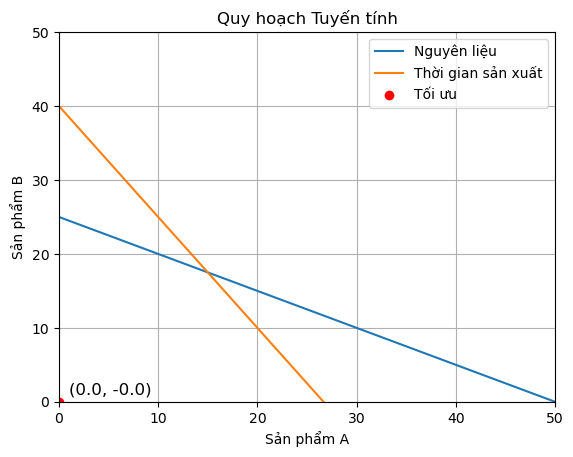

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Vẽ đường ràng buộc
x = np.linspace(0, 50, 100)
plt.plot(x, (100 - 2*x) / 4, label='Nguyên liệu')
plt.plot(x, (80 - 3*x) / 2, label='Thời gian sản xuất')

# Vẽ điểm tối ưu
plt.scatter(sol['x'][0], sol['x'][1], color='red', label='Tối ưu')
plt.text(sol['x'][0] + 1, sol['x'][1] + 1, f'({sol["x"][0]:.1f}, {sol["x"][1]:.1f})', fontsize=12)

# Thiết lập trục và nhãn
plt.xlim(0, 50)
plt.ylim(0, 50)
plt.xlabel('Sản phẩm A')
plt.ylabel('Sản phẩm B')
plt.legend()
plt.grid(True)
plt.title('Quy hoạch Tuyến tính')
plt.show()

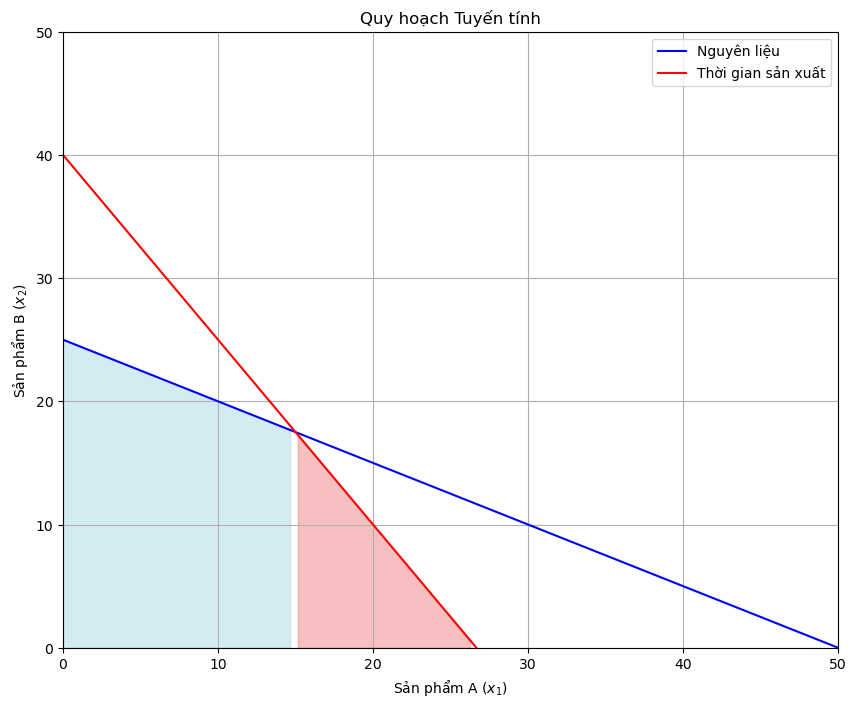

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Định nghĩa dữ liệu
x = np.linspace(0, 50, 100)

# Đường ràng buộc nguyên liệu: 2x_1 + 4x_2 = 100
y1 = (100 - 2*x) / 4

# Đường ràng buộc thời gian sản xuất: 3x_1 + 2x_2 = 80
y2 = (80 - 3*x) / 2

# Vẽ đồ thị
plt.figure(figsize=(10, 8))
plt.plot(x, y1, label='Nguyên liệu', color='blue')
plt.plot(x, y2, label='Thời gian sản xuất', color='red')

# Vẽ khu vực khả thi
plt.fill_between(x, 0, y1, where=(y1 >= 0) & (y1 <= y2), color='lightblue', alpha=0.5)
plt.fill_between(x, 0, y2, where=(y2 >= 0) & (y2 <= y1), color='lightcoral', alpha=0.5)

# Thiết lập trục và nhãn
plt.xlim(0, 50)
plt.ylim(0, 50)
plt.xlabel('Sản phẩm A ($x_1$)')
plt.ylabel('Sản phẩm B ($x_2$)')
plt.title('Quy hoạch Tuyến tính')
plt.legend()
plt.grid(True)

# Hiển thị đồ thị
plt.show()

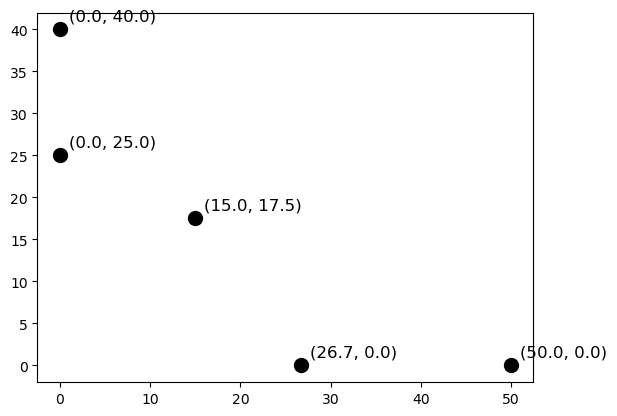

In [4]:
# Điểm giao giữa đường thẳng nguyên liệu và trục x_1
point1 = (50, 0)

# Điểm giao giữa đường thẳng thời gian sản xuất và trục x_1
point2 = (80/3, 0)

# Điểm giao giữa đường thẳng nguyên liệu và trục x_2
point3 = (0, 25)

# Điểm giao giữa đường thẳng thời gian sản xuất và trục x_2
point4 = (0, 40)

# Điểm giao giữa hai đường thẳng
point5 = (15, 17.5)

# Đánh dấu các điểm trên đồ thị
plt.scatter(point1[0], point1[1], color='black', s=100, zorder=5)
plt.scatter(point2[0], point2[1], color='black', s=100, zorder=5)
plt.scatter(point3[0], point3[1], color='black', s=100, zorder=5)
plt.scatter(point4[0], point4[1], color='black', s=100, zorder=5)
plt.scatter(point5[0], point5[1], color='black', s=100, zorder=5)

# Thêm nhãn cho các điểm
plt.text(point1[0] + 1, point1[1] + 1, f'({point1[0]:.1f}, {point1[1]:.1f})', fontsize=12)
plt.text(point2[0] + 1, point2[1] + 1, f'({point2[0]:.1f}, {point2[1]:.1f})', fontsize=12)
plt.text(point3[0] + 1, point3[1] + 1, f'({point3[0]:.1f}, {point3[1]:.1f})', fontsize=12)
plt.text(point4[0] + 1, point4[1] + 1, f'({point4[0]:.1f}, {point4[1]:.1f})', fontsize=12)
plt.text(point5[0] + 1, point5[1] + 1, f'({point5[0]:.1f}, {point5[1]:.1f})', fontsize=12)

# Hiển thị đồ thị
plt.show()

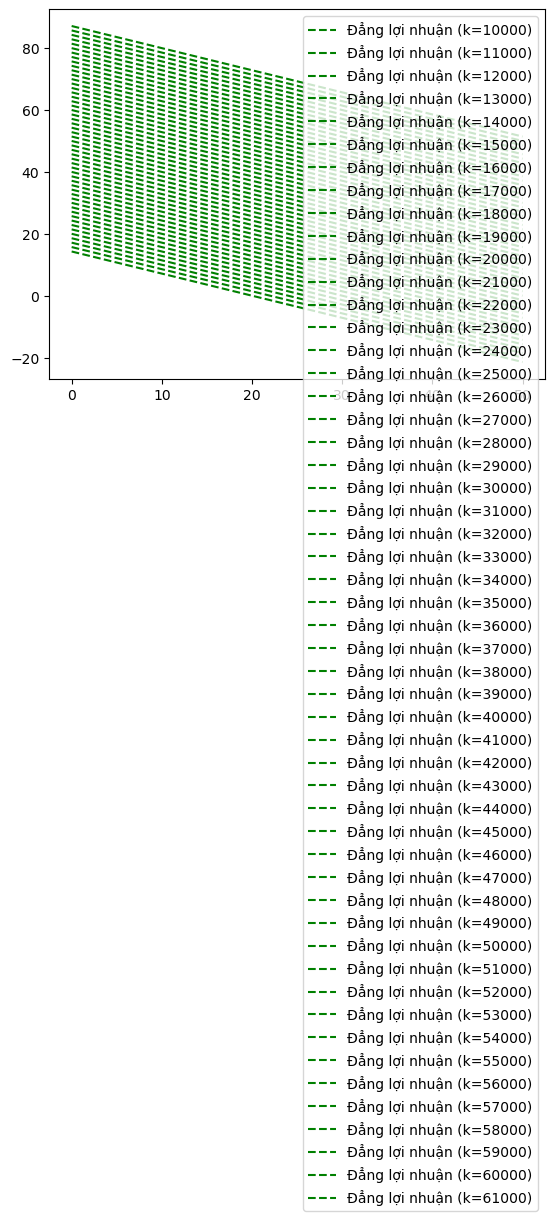

In [5]:
# Hàm mục tiêu: z = 500x_1 + 700x_2
# Đường đẳng lợi nhuận: 500x_1 + 700x_2 = k

# Chọn một giá trị k ban đầu
k = 10000
z = k / 700
y3 = (k - 500*x) / 700

# Vẽ đường đẳng lợi nhuận
plt.plot(x, y3, label=f'Đẳng lợi nhuận (k={k})', linestyle='--', color='green')

# Di chuyển đường đẳng lợi nhuận đến giá trị tối ưu
while True:
    if max(y3) < 0 or min(y3) > 50:
        break
    k += 1000
    z = k / 700
    y3 = (k - 500*x) / 700
    plt.plot(x, y3, label=f'Đẳng lợi nhuận (k={k})', linestyle='--', color='green')

# Hiển thị đồ thị
plt.legend()
plt.show()

In [6]:
import cvxopt
from cvxopt import matrix, solvers

# Định nghĩa dữ liệu
c = matrix([-500.0, -700.0])  # Hệ số mục tiêu (đổi dấu vì cvxopt giải bài toán tối thiểu)
G = matrix([[2.0, 4.0], [3.0, 2.0]])  # Ma trận ràng buộc bất đẳng thức
h = matrix([100.0, 80.0])  # Giới hạn của ràng buộc
A = matrix([[1.0, 0.0], [0.0, 1.0]])  # Ràng buộc không âm
b = matrix([0.0, 0.0])  # Giá trị của ràng buộc không âm

# Giải bài toán
sol = solvers.lp(c, G.T, h, A.T, b)

# In kết quả
print("Giá trị tối ưu:", -sol['primal objective'])  # Đổi dấu để lấy giá trị tối đa
print("Giải pháp tối ưu:")
print("Số lượng sản phẩm A:", sol['x'][0])
print("Số lượng sản phẩm B:", sol['x'][1])

     pcost       dcost       gap    pres   dres   k/t
 0:  2.0952e-11 -1.8000e+02  2e+02  3e-14  9e-03  1e+00
 1:  2.0952e-13 -1.8000e+00  2e+00  3e-16  9e-05  1e-02
 2:  2.0952e-15 -1.8000e-02  2e-02  3e-16  9e-07  1e-04
 3:  2.0954e-17 -1.8000e-04  2e-04  2e-16  9e-09  1e-06
 4:  6.0922e-19 -1.8000e-06  2e-06  7e-17  9e-11  1e-08
 5: -1.0307e-12 -1.8000e-08  2e-08  2e-15  9e-13  1e-10
Optimal solution found.
Giá trị tối ưu: 1.0306578097344934e-12
Giải pháp tối ưu:
Số lượng sản phẩm A: 2.2582335811626348e-15
Số lượng sản phẩm B: -1.406556869240341e-16
